# Machine Learning Engineer Nanodegree
## Capstone Project
Elissa Backas
August 15, 2017


Colun
* CASEID  "Case identification number" #id number to correlate with the other survey
* PREGORDR   "Pregnancy order (number)"
* PREGEND1    "BC-1 How Pregnancy Ended - 1st mention"
* WKSGEST     "Gestational length of completed pregnancy (in weeks)"
* BPA_BDSCHECK1     "Whether 1st liveborn baby from this pregnancy was BPA or BDS" #drop babies who died or were given away for adoption
* BABYSEX1     "BD-2 Sex of 1st Liveborn Baby from This Pregnancy"
* CMBABDOB     "CM for baby's or babies' date of birth (delivery date)"
* HPAGELB     "BD-6 Father's age at time of child(ren) s birth"
* PRIORSMK     "BE-3 Amount R smoked in 6 mos before R knew she was pregnant" #I'd like to use this, but not enough data
* NPOSTSMK     "BE-5 Amount R smoked during pregnancy after R knew she was preg" #I'd like to use this, but not enough data
* GETPRENA     "BE-6 Any prenatal care for this pregnancy" #I'd like to use this, but not enough data
* CMKIDIED,2,3   "CM for child's date of death - 1st from this pregnancy" #only multiples died, will remove those rows from the data
* OUTCOM_S     "Outcome of pregnancy (based on corrected/chron sorted data)"
* NBRNLV_S     "# of babies born alive from this preg (based on CCSD)" #drop women with NaN for this
* COHPBEG     "EG-18a Was R living w/father of preg at beginning of preg"
* COHPEND     "EG-18b Was R living w/father of preg when preg ended/baby was born"
* BIRTHORD     "Birth order"
* AGEPREG     "Age at pregnancy outcome"
* DATECON     "CM date of conception"
* AGECON     "Age at time of conception"
* FMAROUT5     "Formal marital status at pregnancy outcome"
* PMARPREG     "Whether pregnancy ended before R's 1st marriage (premaritally)"
* RMAROUT6     "Informal marital status at pregnancy outcome - 6 categories"
* FMARCON5     "Formal marital status at conception - 5 categories"
* RMARCON6     "Informal marital status at conception - 6 categories"
* PAYDELIV     "Payment for delivery"
* LBW1     "Low birthweight - 1st baby from this preg"
* **BFEEDWKS     "Duration of breastfeeding in weeks" #trying to predict this**
* EDUCAT     "Education (completed years of schooling)"
* HIEDUC     "Highest completed year of school or degree"
* RACE     "Race"
* HISPANIC     "Hispanic origin"
* HISPRACE     "Race & Hispanic origin of respondent - 1977 OMB standards (respondent recode)"
* HISPRACE2     "Race & Hispanic origin of respondent - 1997 OMB standards (respondent recode)"
* RCURPREG     "Pregnant at time of interview"
* PREGNUM     "CAPI-based total number of pregnancies"
* PARITY     "Total number of live births"
* CURR_INS     "Current health insurance coverage"
* PUBASSIS     "Whether R received public assistance in prior calendar year"
* POVERTY    "Poverty level income"
* LABORFOR     "Labor force status"
* RELIGION     "Current religious affiliation"
* METRO     "Place of residence (Metropolitan / Nonmetropolitan)"
* BRNOUT     "IB-8 R born outside of US"
* YRSTRUS     "Year R came to the United States" #not enough data


In [1]:
import pandas as pd
import thinkstats2

def ReadFemPreg(dct_file='2013_2015_FemPregSetup.dct',
                dat_file='2013_2015_FemPregData.dat'):
    #thinkstats converter 
    #https://github.com/boydjj/think_stats
    dct = thinkstats2.ReadStataDct(dct_file)
    #https://www.safaribooksonline.com/library/view/think-stats-2nd/9781491907344/ch01.html
    df = pd.read_fwf(dat_file, colspecs=dct.colspecs, names=dct.names, header=None)
    return df

In [29]:
myfile = ReadFemPreg()
myfile

,CASEID,PREGORDR,HOWPREG_N,HOWPREG_P,MOSCURRP,NOWPRGDK,PREGEND1,PREGEND2,HOWENDDK,NBRNALIV,...,SECU,SEST,CMINTVW,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,QUARTER,PHASE,INTVWYEAR
0,60418,1,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
1,60418,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
2,60418,3,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,4,342,1381,1369,1345,1333,1321,14,1,2015
3,60419,1,33.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,...,3,318,1388,1376,1345,1333,1321,16,1,2015
4,60420,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,1,339,1388,1376,1345,1333,1321,16,1,2015
5,60420,2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1,339,1388,1376,1345,1333,1321,16,1,2015
6,60423,1,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,355,1387,1375,1345,1333,1321,16,1,2015
7,60423,2,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,...,2,355,1387,1375,1345,1333,1321,16,1,2015
8,60426,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,3,344,1368,1356,1321,1309,1297,9,1,2013
9,60426,2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,...,3,344,1368,1356,1321,1309,1297,9,1,2013


In [30]:
#drop women still breastfeeding
myfile = myfile[myfile.BFEEDWKS != 994]
#drop women with no breastfeeding data
myfile = myfile[myfile.BFEEDWKS.notnull()]
#if never breastfed, set number of weeks equal to 0
myfile.loc[myfile['BFEEDWKS'] == 995, 'BFEEDWKS'] = 0
#drop if no babies born
myfile = myfile.dropna(subset=['NBRNLV_S'])
#drop if pregnancy ended in miscarriage, stilbirth or abortion
myfile = myfile[myfile.PREGEND1 >= 5]
#drop if baby died or given away for adoption
myfile = myfile[myfile.BPA_BDSCHECK1 == 0]
#fill "not ascertained, refused, don't know answers with mean
myfile.loc[myfile['CMBABDOB'] >= 9997, 'CMBABDOB'] = myfile.CMBABDOB.mean()
myfile.loc[myfile['HPAGELB'] >= 98, 'HPAGELB'] = myfile.HPAGELB.mean()

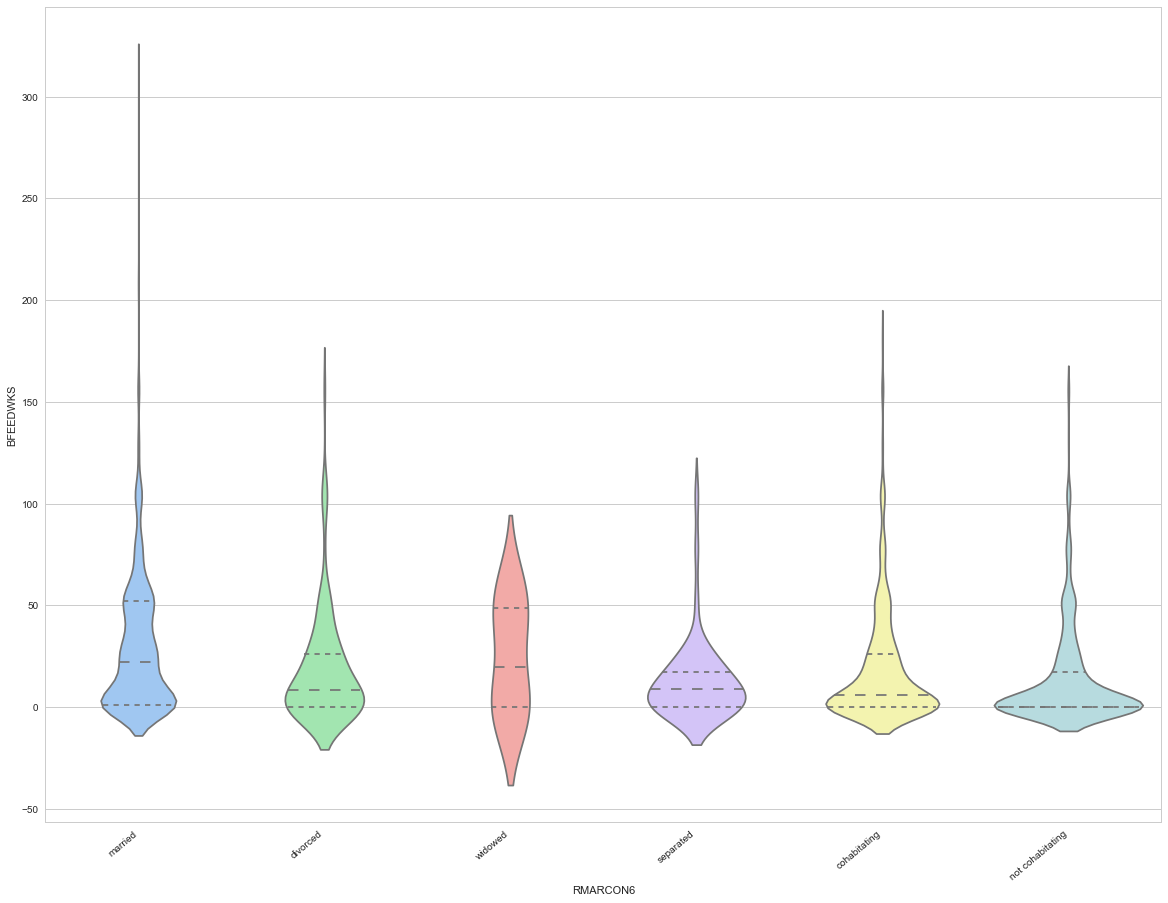

In [31]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
mypplot = sns.violinplot(x="RMARCON6", y="BFEEDWKS", data=myfile, split=True,
              inner="quart")
mypplot.set_xticklabels(['married', 'divorced', 'widowed', 'separated', 'cohabitating', 'not cohabitating'], rotation=40, ha="right")


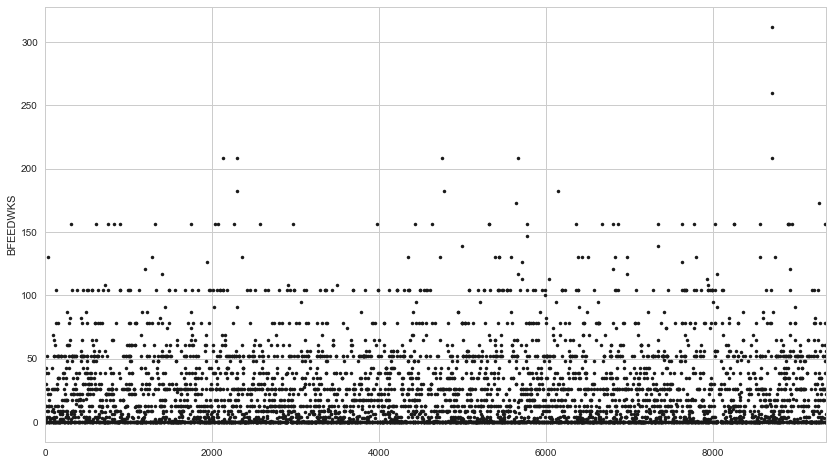

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
myfile['BFEEDWKS'].plot(style='k.', figsize = (14,8))
plt.ylabel('BFEEDWKS')
plt.show()
#sns.distplot(myfile.BFEEDWKS)

In [33]:
df = pd.DataFrame(myfile, columns=['PREGORDR', 'PREGEND1', 'WKSGEST', 'BABYSEX1', 'CMBABDOB',  'HPAGELB', 'COHPBEG', 'COHPEND', 'BIRTHORD', 'AGEPREG', 'DATECON', 'AGECON', 'FMAROUT5', 'PMARPREG', 'RMAROUT6', 'FMARCON5', 'RMARCON6', 'PAYDELIV', 'LBW1', 'BFEEDWKS', 'EDUCAT', 'HIEDUC', 'RACE', 'HISPANIC', 'HISPRACE', 'HISPRACE2', 'PREGNUM', 'PARITY', 'CURR_INS', 'PUBASSIS', 'POVERTY', 'LABORFOR', 'RELIGION', 'METRO', 'BRNOUT'])
#inspect the features to make sure there's enough data for each and nothing looks "off"
for feature in df.keys():
    print df[feature].value_counts(dropna=False)
    print df[feature].describe()

1     1963
2     1565
3      968
4      501
5      233
6      104
7       54
8       24
9       11
10       6
11       4
12       2
20       1
Name: PREGORDR, dtype: int64
count    5436.000000
mean        2.319169
std         1.493761
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: PREGORDR, dtype: float64
6.0    3882
5.0    1554
Name: PREGEND1, dtype: int64
count    5436.000000
mean        5.714128
std         0.451870
min         5.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         6.000000
Name: PREGEND1, dtype: float64
39.0    1978
40.0    1125
38.0     656
37.0     368
41.0     356
36.0     251
42.0     183
35.0     183
32.0      79
34.0      55
43.0      47
30.0      43
28.0      22
33.0      21
26.0      14
29.0      13
27.0      12
31.0       8
24.0       6
44.0       6
25.0       3
45.0       3
46.0       2
23.0       1
48.0       1
Name: WKSGEST, dtype: int64
count    5436.000000
mea

In [34]:
from sklearn.preprocessing import MinMaxScaler

continuous = ['PREGORDR','WKSGEST', 'CMBABDOB', 'HPAGELB', 'BIRTHORD', 'AGEPREG', 
              'DATECON', 'AGECON','BFEEDWKS','EDUCAT','PREGNUM','PARITY','POVERTY']
discrete = ['PREGEND1', 'BABYSEX1', 'COHPBEG', 'COHPEND', 'FMAROUT5', 'PMARPREG',
            'RMAROUT6','FMARCON5', 'RMARCON6', 'PAYDELIV', 'LBW1','HIEDUC', 'RACE',
           'HISPANIC', 'HISPRACE', 'HISPRACE2','CURR_INS','PUBASSIS','LABORFOR',
           'RELIGION','METRO','BRNOUT']
scaler = MinMaxScaler(feature_range=(0, 1))
#scale continuous features
df[continuous] = scaler.fit_transform(df[continuous])
#one hot encode discrete features
df = pd.get_dummies(df, columns=discrete)
for feature in df.keys():
    print df[feature].value_counts(dropna=False)
    print df[feature].describe()
#drop the column we're trying to predict
labels = df['BFEEDWKS']
df = df.drop('BFEEDWKS', axis = 1)

0.000000    1963
0.052632    1565
0.105263     968
0.157895     501
0.210526     233
0.263158     104
0.315789      54
0.368421      24
0.421053      11
0.473684       6
0.526316       4
0.578947       2
1.000000       1
Name: PREGORDR, dtype: int64
count    5436.000000
mean        0.069430
std         0.078619
min         0.000000
25%         0.000000
50%         0.052632
75%         0.105263
max         1.000000
Name: PREGORDR, dtype: float64
0.64    1978
0.68    1125
0.60     656
0.56     368
0.72     356
0.52     251
0.48     183
0.76     183
0.36      79
0.44      55
0.80      47
0.28      43
0.20      22
0.40      21
0.12      14
0.24      13
0.16      12
0.32       8
0.04       6
0.84       6
0.88       3
0.08       3
0.92       2
1.00       1
0.00       1
Name: WKSGEST, dtype: int64
count    5436.000000
mean        0.621729
std         0.096775
min         0.000000
25%         0.600000
50%         0.640000
75%         0.680000
max         1.000000
Name: WKSGEST, dtype: float64


In [45]:
#apply PCA and produce visualization
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
pca = PCA(n_components=6)
pca.fit(df)

def pca_results(good_data, pca):
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    print(variance_ratios)

    #create an identity matrix
    #iden = np.identity(good_data.shape[1])
    #see the weights that correspond with the principle components
    #coef = pca.transform(iden)
    return pd.DataFrame(pca.components_, columns=good_data.columns, index=dimensions)

# Generate PCA results plot
pca_results = pca_results(df, pca)
print (pca_results)
#reduced_data = pca.transform(df)

             Explained Variance
Dimension 1              0.2071
Dimension 2              0.1135
Dimension 3              0.0760
Dimension 4              0.0535
Dimension 5              0.0516
Dimension 6              0.0412
             PREGORDR   WKSGEST  CMBABDOB   HPAGELB  BIRTHORD   AGEPREG  \
Dimension 1  0.003097  0.003828  0.000914  0.027418  0.003004  0.056409   
Dimension 2  0.003394  0.002023 -0.005764 -0.000677  0.010478  0.001221   
Dimension 3  0.000775  0.008305  0.005972 -0.005899 -0.003820 -0.006445   
Dimension 4 -0.016085  0.005525 -0.004607 -0.025415 -0.020977 -0.043440   
Dimension 5 -0.020281  0.012846 -0.036902  0.003572 -0.035422  0.014853   
Dimension 6 -0.002389 -0.003943 -0.000404 -0.002140 -0.004041  0.003575   

              DATECON    AGECON    EDUCAT   PREGNUM    ...     RELIGION_1  \
Dimension 1  0.000791  0.056354  0.074223 -0.004438    ...      -0.007804   
Dimension 2 -0.005843  0.001085 -0.076162  0.005897    ...      -0.014518   
Dimension 3  0.0060

In [54]:
reduced_data = pca.transform(df)
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.1, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 4892 samples.
Testing set has 544 samples.


In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

reg = RandomForestRegressor(random_state=3)
reg.fit(X_train, y_train)
predictions_test = reg.predict(X_test)
predictions_train = reg.predict(X_train[:300])
print(r2_score(y_train[:300], predictions_train))
print(r2_score(y_test, predictions_test))

0.866722602901
0.330111802506
